Loading MobileNetV2 model...


/var/folders/zy/9v0gwz256ll_5x25gl8l28cw0000gn/T/ipykernel_95213/4020216494.py:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


Model loaded successfully!
Model input shape: (None, None, None, 3)
Model output shape: (None, 1280)

Loading image from: /Users/akita/wallpaperio/server_generator/static/images/1_1749391637.jpg


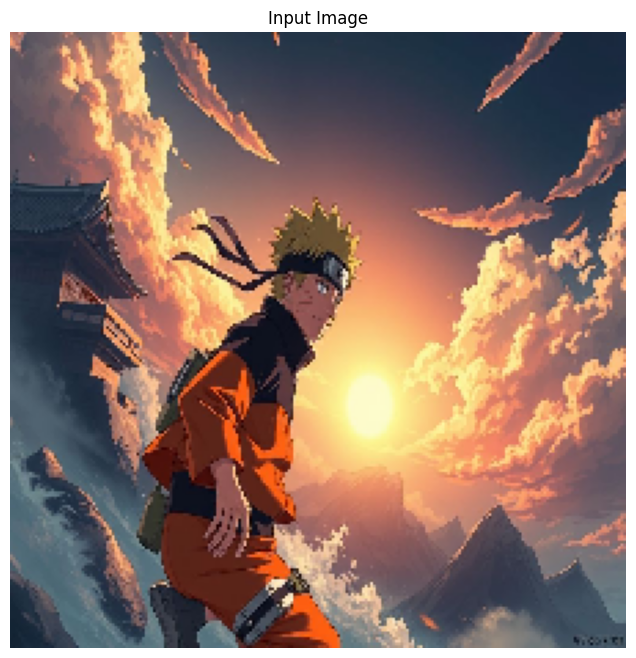


Extracting features...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
Feature vector shape: (1, 1280)
Feature vector (first 5 values): [0.02490867 1.2529796  0.         0.         0.40333802]
Feature vector (last 5 values): [0.01930171 0.9154966  0.         0.0184319  0.13359597]
Feature vector mean: 0.4301
Feature vector std: 0.6305


In [1]:

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


    # Load MobileNetV2 model without the top classification layer
print("Loading MobileNetV2 model...")
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')
print("Model loaded successfully!")
print(f"Model input shape: {base_model.input_shape}")
print(f"Model output shape: {base_model.output_shape}")
# Load the specific image
img_path = '/Users/akita/wallpaperio/server_generator/static/images/1_1749391637.jpg'
print(f"\nLoading image from: {img_path}")
# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Input Image')
plt.show()
# Extract features
print("\nExtracting features...")
features = base_model.predict(img_array)
print(f"Feature vector shape: {features.shape}")
print(f"Feature vector (first 5 values): {features[0][:5]}")
print(f"Feature vector (last 5 values): {features[0][-5:]}")
print(f"Feature vector mean: {np.mean(features[0]):.4f}")
print(f"Feature vector std: {np.std(features[0]):.4f}")



Extracting features...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Feature vector shape: (1, 1280)
Feature vector (first 5 values): [0.02490867 1.2529796  0.         0.         0.40333802]
Feature vector (last 5 values): [0.01930171 0.9154966  0.         0.0184319  0.13359597]
Feature vector mean: 0.4301
Feature vector std: 0.6305

Normalizing features...


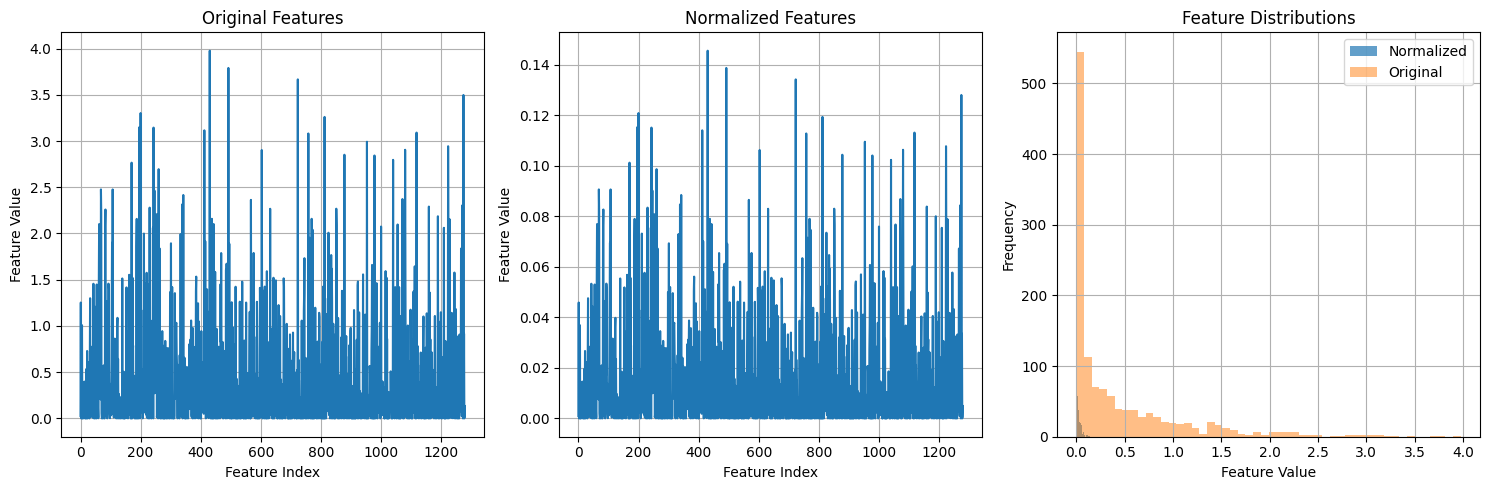


Normalized feature vector (first 5 values): [0.00091221 0.04588699 0.         0.         0.01477116]
Normalized feature vector (last 5 values): [0.00070687 0.03352758 0.         0.00067502 0.00489259]
Normalized feature vector mean: 0.0157
Normalized feature vector std: 0.0231
L2 norm of normalized features: 1.0000


In [5]:
# Extract features
print("\nExtracting features...")
features = base_model.predict(img_array)
print(f"Feature vector shape: {features.shape}")
print(f"Feature vector (first 5 values): {features[0][:5]}")
print(f"Feature vector (last 5 values): {features[0][-5:]}")
print(f"Feature vector mean: {np.mean(features[0]):.4f}")
print(f"Feature vector std: {np.std(features[0]):.4f}")

# Normalize features and visualize
print("\nNormalizing features...")
normalized_features = features / np.linalg.norm(features, axis=1, keepdims=True)

# Create a figure with 3 subplots
plt.figure(figsize=(15, 5))

# Plot 1: Original features
plt.subplot(1, 3, 1)
plt.plot(features[0])
plt.title('Original Features')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.grid(True)

# Plot 2: Normalized features
plt.subplot(1, 3, 2)
plt.plot(normalized_features[0])
plt.title('Normalized Features')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.grid(True)

# Plot 3: Feature distributions
plt.subplot(1, 3, 3)
plt.hist(normalized_features[0], bins=50, alpha=0.7, label='Normalized')
plt.hist(features[0], bins=50, alpha=0.5, label='Original')
plt.title('Feature Distributions')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nNormalized feature vector (first 5 values): {normalized_features[0][:5]}")
print(f"Normalized feature vector (last 5 values): {normalized_features[0][-5:]}")
print(f"Normalized feature vector mean: {np.mean(normalized_features[0]):.4f}")
print(f"Normalized feature vector std: {np.std(normalized_features[0]):.4f}")
print(f"L2 norm of normalized features: {np.linalg.norm(normalized_features[0]):.4f}")